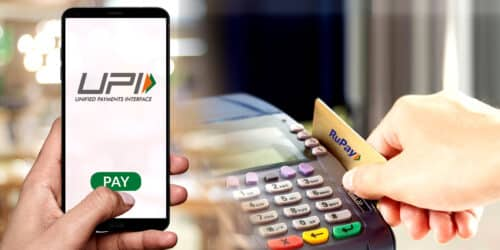

In [1]:
from IPython.display import Image
Image(filename ='E:/PIP_Devmallya/Week_1/Problem_2/UPI-and-Rupay-Card.jpg', width = 800, height = 200)

# Problem Description:

Prepare a Machine Learning Model to predict the Persistency 13M Payment Behaviour at the New Business stage.

# Objective:

Using Machine Learning techniques, provide scores for each policy at the New Business stage the likelihood to pay the 13M premium.

Identify the segments where maximum non payers are captured.

# Dataset:

“Training” & “Test” Dataset with the raw input attributes and the 13M actual paid/not paid flag.

“Out of Time” Datasets would be provided with just the raw input attributes.

# Expected Steps:

 Conduct appropriate Data Treatments for e.g. Missing Value Imputation, Outlier treatment etc.
 
 Conduct required Feature Engineering for e.g. Binning, Ratio, Interaction, Polynomial  etc.
 
 Use any machine learning algorithm or combination of machine learning algorithms you deem fit.
 
 Prepare your model on the Train Data and you can evaluate the generalization capability of your model by using K-Fold Cross Validation, Leave One Out.
 
 Cross Validation or any other validation technique that you see appropriate.
 
 Score the Test and Out of Time Data and share it back to us along with the scored Train Data for evaluation. Also share all the Model Codes.

# 1. Import the Dependencies

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
from patsy import dmatrices                
import sklearn
import statsmodels.api as sm
from scipy import stats
from scipy.special import factorial
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
%matplotlib inline
sns.set(style='darkgrid')
warnings.filterwarnings('ignore')

# 2. Load the dataset

By giving a parameter value for the file name (e.g. pd. read csv("filename. csv")), we may import tabular data from CSV files into pandas dataframes using the pandas package's read csv() method. Remember that we gave pandas an alias (pd), so will'll be calling pandas functions with pd.

In [3]:
df_train = pd.read_csv('E:/PIP_Devmallya/Week_1/Problem_2/Final_data.csv')
df_train.head()

,Mapped Agent 13M Persistency,Applicant's Policy Annualized Premium,Mapped Agent Vintage,Auto Debit of Premium Opted Flag(Yes/No),Application Life Assured BMI,Total Risk Exposure of HDFC Life w.r.t. Life Assured,Application Sourcing Channel,Application Life Assured City,Application Life Assured City Tier,Application Life Assured Age,...,Applicant's Policy Sum Assured,HDFC Life Operational Zone,Application Login year,Application Login month,Application Login day,Mapped Agent city,Applicant's Policy Contract city,Target,smoker_drinker,Perf+vintage
0,93.47,7157.0,33.0,Y,1.0,10000000.0,HDFC BANK,bangalore,Tier I,"(6.999, 33.0]",...,10000000.0,North 1,2018,7,7,Delhi,Delhi,1,NN,3084.51
1,81.59,25000.0,42.0,N,3.0,145501.0,HDFC BANK,others,Tier III,"(41.0, 50.0]",...,145501.0,West,2018,3,31,Ahmedabad,Ahmedabad,1,NN,3426.78
2,87.58,35000.0,35.0,Y,2.0,800000.0,Ex-HDFC,jaipur,Tier II,"(50.0, 66.0]",...,1600000.0,North 2,2018,6,9,Jaipur,Jaipur,1,NN,3065.30
3,80.18,100000.0,12.0,Y,2.0,1000000.0,HDFC BANK,jaipur,Tier II,"(6.999, 33.0]",...,2000000.0,North 2,2018,2,21,Jaipur,Mumbai,1,NN,962.16
4,97.19,15000.0,45.0,Y,2.0,300000.0,HDFC BANK,others,Tier III,"(33.0, 41.0]",...,165000.0,West,2018,6,6,others,others,1,NN,4373.55


In [4]:
df_train.columns

Index(['Mapped Agent 13M Persistency', 'Applicant's Policy Annualized Premium',
       'Mapped Agent Vintage', 'Auto Debit of Premium Opted Flag(Yes/No)',
       'Application Life Assured BMI',
       'Total Risk Exposure of HDFC Life w.r.t. Life Assured',
       'Application  Sourcing Channel', 'Application  Life Assured City',
       'Application  Life Assured City Tier', 'Application  Life Assured Age',
       'Application  Life Assured Education',
       'Application  Life Assured Gender', 'Application  Life Assured Income',
       'Application  Life Assured Industry',
       'Application  Life Assured Marital Status',
       'Application  Life Assured Occupation',
       'Applicant's Policy PAR/NON PAR/ULIP Tag',
       'Application Specific Sourcing Partner', 'First Premium Payment Type',
       'Applicant's Policy Product Category',
       'Applicant's Policy Premium Payment Frequency',
       'Applicant's Policy Product Name',
       'Applicant's Policy Price Sensitivity(1-'Yes

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25320 entries, 0 to 25319
Data columns (total 38 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Mapped Agent 13M Persistency                           25320 non-null  float64
 1   Applicant's Policy Annualized Premium                  25320 non-null  float64
 2   Mapped Agent Vintage                                   25320 non-null  float64
 3   Auto Debit of Premium Opted Flag(Yes/No)               25320 non-null  object 
 4   Application Life Assured BMI                           25320 non-null  float64
 5   Total Risk Exposure of HDFC Life w.r.t. Life Assured   25320 non-null  float64
 6   Application  Sourcing Channel                          25320 non-null  object 
 7   Application  Life Assured City                         25320 non-null  object 
 8   Application  Life Assured City Tier           

In [6]:
df_train.std()

Mapped Agent 13M Persistency                             1.439343e+01
Applicant's Policy Annualized Premium                    7.173271e+04
Mapped Agent Vintage                                     1.803208e+01
Application Life Assured BMI                             1.631083e+00
Total Risk Exposure of HDFC Life w.r.t. Life Assured     4.910357e+06
Application  Life Assured Income                         1.486164e+06
Applicant's Policy Price Sensitivity(1-'Yes', 0-'No')    3.064271e-01
Applicant's Policy Risk Cessation Term                   7.217959e+00
Applicant's Policy Rider Opted Flag(1-'Yes', 0-'No')     4.996883e-01
Applicant's Policy Sum Assured                           2.685334e+06
Application Login year                                   2.972338e-01
Application Login month                                  3.717016e+00
Application Login day                                    9.387921e+00
Target                                                   4.152279e-01
Perf+vintage        

# 3. Label Encoding

* Label encoding is the process of translating labels into a numeric format so that they may be read by machines. Machine learning algorithms can then make better decisions about how those labels should be used. In supervised learning, it is a crucial pre-processing step for the structured dataset.
* Sklearn is an extremely efficient technique for encoding categorical feature levels into numeric values. LabelEncoder encodes labels with values ranging from 0 to n classes-1, where n is the number of different labels. If a label is repeated, it is allocated the same value as before.
* one hot encoding = A one-hot encoding provides for more expressive categorical data representation. Many machine learning algorithms are unable to operate directly with categorical data. The categories must be numerically transformed. This is necessary for categorical input and output variables.

In [8]:
label_encoder = preprocessing.LabelEncoder()

In [9]:
df_train['Auto Debit of Premium Opted Flag(Yes/No)']= label_encoder.fit_transform(df_train['Auto Debit of Premium Opted Flag(Yes/No)']) 
df_train['Auto Debit of Premium Opted Flag(Yes/No)'].unique() 

array([1, 0])

In [10]:
df_train['Application  Sourcing Channel']= label_encoder.fit_transform(df_train['Application  Sourcing Channel']) 
df_train['Application  Sourcing Channel'].unique()

array([2, 1, 0, 3, 4, 5, 6])

In [11]:
df_train['Application  Life Assured City']= label_encoder.fit_transform(df_train['Application  Life Assured City']) 
df_train['Application  Life Assured City'].unique()

array([ 1, 10,  6, 11,  2,  9, 12,  4,  7,  0,  8,  5,  3, 13])

In [12]:
df_train['Application  Life Assured City Tier']= label_encoder.fit_transform(df_train['Application  Life Assured City Tier']) 
df_train['Application  Life Assured City Tier'].unique() 

array([0, 2, 1])

In [13]:
df_train['Application  Life Assured Education']= label_encoder.fit_transform(df_train['Application  Life Assured Education']) 
df_train['Application  Life Assured Education'].unique() 

array([ 4,  1,  0, 11,  6,  2,  3, 12,  7,  8,  5,  9, 10])

In [14]:
df_train['Application  Life Assured Gender']= label_encoder.fit_transform(df_train['Application  Life Assured Gender']) 
df_train['Application  Life Assured Gender'].unique()

array([0, 1])

In [15]:
df_train['Application  Life Assured Industry']= label_encoder.fit_transform(df_train['Application  Life Assured Industry']) 
df_train['Application  Life Assured Industry'].unique()

array([ 9, 10,  7,  8,  3,  2,  6,  1,  0,  4,  5])

In [16]:
df_train['Application  Life Assured Marital Status']= label_encoder.fit_transform(df_train['Application  Life Assured Marital Status']) 
df_train['Application  Life Assured Marital Status'].unique() 

array([2, 1, 3, 0])

In [17]:
df_train['Application  Life Assured Occupation']= label_encoder.fit_transform(df_train['Application  Life Assured Occupation']) 
df_train['Application  Life Assured Occupation'].unique() 

array([3, 4, 0, 2, 5, 6, 1])

In [18]:
df_train["Applicant's Policy PAR/NON PAR/ULIP Tag"]= label_encoder.fit_transform(df_train["Applicant's Policy PAR/NON PAR/ULIP Tag"]) 
df_train["Applicant's Policy PAR/NON PAR/ULIP Tag"].unique() 

array([0, 1, 2])

In [19]:
df_train['Application Specific Sourcing Partner']= label_encoder.fit_transform(df_train['Application Specific Sourcing Partner']) 
df_train['Application Specific Sourcing Partner'].unique() 

array([ 44,  46,  70,  80,  29,  95,  78,  73,  39,   9,  57,  45,  49,
        31,  85, 111, 122,  14,  90, 115,  12,   7,  10,  18,  24,  91,
        66,  51,  19, 109,   8, 102, 114,  77,  83,  22,  88, 108,  96,
        67,  41,  84,   3,  30, 107,  52,  20,  21, 116,  42,  47, 120,
        58,   0,  64, 118, 112,  94,  28, 110,  75,  36,  62,  74, 113,
       125, 121,  48,  65, 106, 103,  60,   6,  93,  71,  55, 119,  59,
       117,   4,  15,  27,  50,  11,   5, 124,  82,  54,  79,  16,  43,
        26,  53, 105,  86,  33,  97, 101, 104, 123,  72,  37,  25,  63,
        87,  92,  99,  56,  23,  61,  40,  35,  69,  34,   1,  89,  76,
        68,   2, 100,  32,  81,  98,  17,  38,  13])

In [20]:
df_train['First Premium Payment Type']= label_encoder.fit_transform(df_train['First Premium Payment Type']) 
df_train['First Premium Payment Type'].unique() 

array([4, 6, 1, 3, 7, 5, 8, 2, 0])

In [21]:
df_train["Applicant's Policy Product Category"]= label_encoder.fit_transform(df_train["Applicant's Policy Product Category"]) 
df_train["Applicant's Policy Product Category"].unique() 

array([2, 3, 1, 0])

In [22]:
df_train["Applicant's Policy Premium Payment Frequency"]= label_encoder.fit_transform(df_train["Applicant's Policy Premium Payment Frequency"]) 
df_train["Applicant's Policy Premium Payment Frequency"].unique() 

array([0, 2, 1, 3])

In [23]:
df_train["Applicant's Policy Product Name"]= label_encoder.fit_transform(df_train["Applicant's Policy Product Name"]) 
df_train["Applicant's Policy Product Name"].unique()

array([ 2,  7, 14,  4, 16,  1, 15, 17, 13,  6,  8, 10,  3,  9, 18,  5,  0,
       12, 11])

In [24]:
df_train['Application Life Assured Residential Status']= label_encoder.fit_transform(df_train['Application Life Assured Residential Status']) 
df_train['Application Life Assured Residential Status'].unique()

array([1, 0])

In [25]:
df_train['Application Life Assured State']= label_encoder.fit_transform(df_train['Application Life Assured State']) 
df_train['Application Life Assured State'].unique() 

array([ 3,  1,  8,  6,  5,  9,  4,  7, 10, 12,  0,  2, 11])

In [26]:
df_train['Application Sourcing Sub Channel']= label_encoder.fit_transform(df_train['Application Sourcing Sub Channel']) 
df_train['Application Sourcing Sub Channel'].unique() 

array([1, 3, 0, 2, 7, 6, 4, 5])

In [27]:
df_train['HDFC Life Operational Zone']= label_encoder.fit_transform(df_train['HDFC Life Operational Zone']) 
df_train['HDFC Life Operational Zone'].unique() 

array([1, 5, 2, 3, 4, 0])

In [28]:
df_train['Mapped Agent city']= label_encoder.fit_transform(df_train['Mapped Agent city']) 
df_train['Mapped Agent city'].unique() 

array([ 4,  0,  6, 10,  9,  3,  2,  7,  5,  8,  1])

In [29]:
df_train["Applicant's Policy Contract city"]= label_encoder.fit_transform(df_train["Applicant's Policy Contract city"]) 
df_train["Applicant's Policy Contract city"].unique() 

array([ 4,  0,  8, 10, 13, 11,  3,  2,  5,  9,  6,  7,  1, 12])

In [30]:
df_train["Application  Life Assured Age"]= label_encoder.fit_transform(df_train["Application  Life Assured Age"]) 
df_train["Application  Life Assured Age"].unique()

array([3, 1, 2, 0])

In [31]:
df_train["smoker_drinker"]= label_encoder.fit_transform(df_train["smoker_drinker"]) 
df_train["smoker_drinker"].unique()

array([0, 3, 2, 1])

In [32]:
df_train = df_train.drop('Perf+vintage', axis = 1)

In [33]:
df_train_1 = df_train.copy()

In [35]:
scaler = StandardScaler()
scaler.fit(df_train_1)

StandardScaler()

In [36]:
df_train_1 = scaler.transform(df_train_1)

# 4. Principal Component Analysis Model

* Principal component analysis (PCA) is a technique used to reduce the dimensionality of such datasets, boosting interpretability while minimising information loss. It accomplishes this by generating new uncorrelated variables that gradually optimise variance.
* Principal Component Analysis, or PCA, is a dimensionality-reduction approach that is frequently used to decrease the dimensionality of big data sets by reducing a large collection of variables into a smaller set that retains the majority of the information in the large set.
* PCA is based on mathematics.
  * Take the entire dataset with d+1 dimensions and remove the labels, resulting in a d dimensional dataset.
  * Calculate the mean for each dimension of the whole dataset.
  * Calculate the covariance matrix for the entire dataset.
  * Compute the eigenvectors and eigenvalues.
* Principal components are formed in the order in which they capture the most variance: PC1 catches the most variation, PC2 captures the second most, and so on. Each of them provides some data information, and there are as many principle components as there are features in a PCA.

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA(n_components=4)

In [39]:
pca.fit(df_train_1)

PCA(n_components=4)

In [40]:
x_pca = pca.transform(df_train_1)

The transform technique transforms all of the characteristics based on their mean and variance. Now, we want scaling to be applied to our test data as well, but we don't want our model to be biassed. We want our test data to be an entirely fresh and unexpected collection for our model.

Text(0, 0.5, 'Second Principal Component')

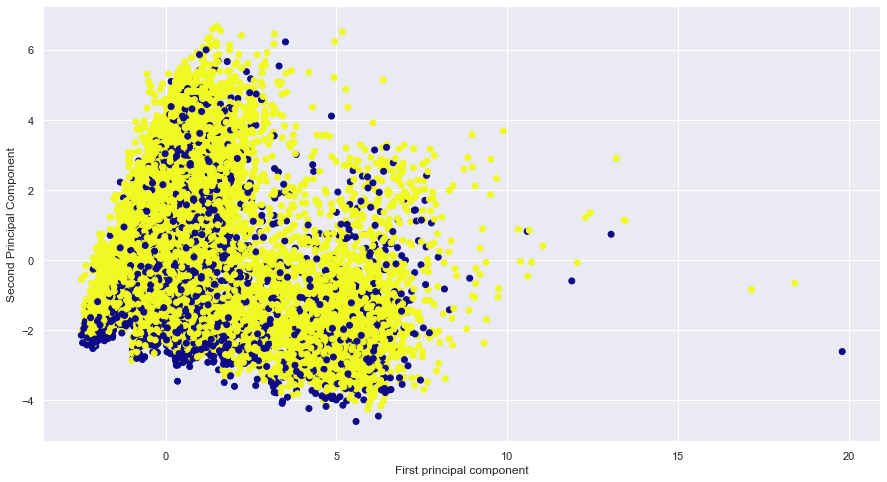

In [45]:
plt.figure(figsize=(15,8))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df_train['Target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [46]:
df_train_comp = pd.DataFrame(pca.components_, columns = df_train.columns)
df_train_comp.head()

,Mapped Agent 13M Persistency,Applicant's Policy Annualized Premium,Mapped Agent Vintage,Auto Debit of Premium Opted Flag(Yes/No),Application Life Assured BMI,Total Risk Exposure of HDFC Life w.r.t. Life Assured,Application Sourcing Channel,Application Life Assured City,Application Life Assured City Tier,Application Life Assured Age,...,Application Sourcing Sub Channel,Applicant's Policy Sum Assured,HDFC Life Operational Zone,Application Login year,Application Login month,Application Login day,Mapped Agent city,Applicant's Policy Contract city,Target,smoker_drinker
0,0.012756,0.008479,-0.034121,-0.012765,0.036669,0.294260,0.086860,-0.108345,-0.155918,-0.004817,...,0.210186,0.373010,0.116988,-0.001788,0.017133,0.000918,-0.150347,-0.143759,0.005982,0.107931
1,0.047400,0.231326,0.025403,0.055738,0.013409,-0.013707,-0.093385,-0.421509,-0.388756,0.002046,...,-0.091899,-0.047407,0.076210,-0.024298,0.000666,0.024158,-0.402037,-0.427330,0.079575,-0.029214
2,0.066413,0.365273,0.158753,0.277102,-0.003667,0.301968,-0.158205,0.119447,0.026226,-0.135836,...,-0.179962,0.292914,0.096077,-0.106597,0.106410,0.048819,0.254785,0.233764,0.283843,-0.009411
3,-0.052496,0.009720,-0.025747,-0.449762,-0.032329,0.175979,-0.222266,-0.069654,0.048397,-0.115995,...,-0.205666,0.184110,-0.148061,-0.094024,0.014042,-0.004592,-0.111672,-0.124458,-0.404897,0.177303


<AxesSubplot:>

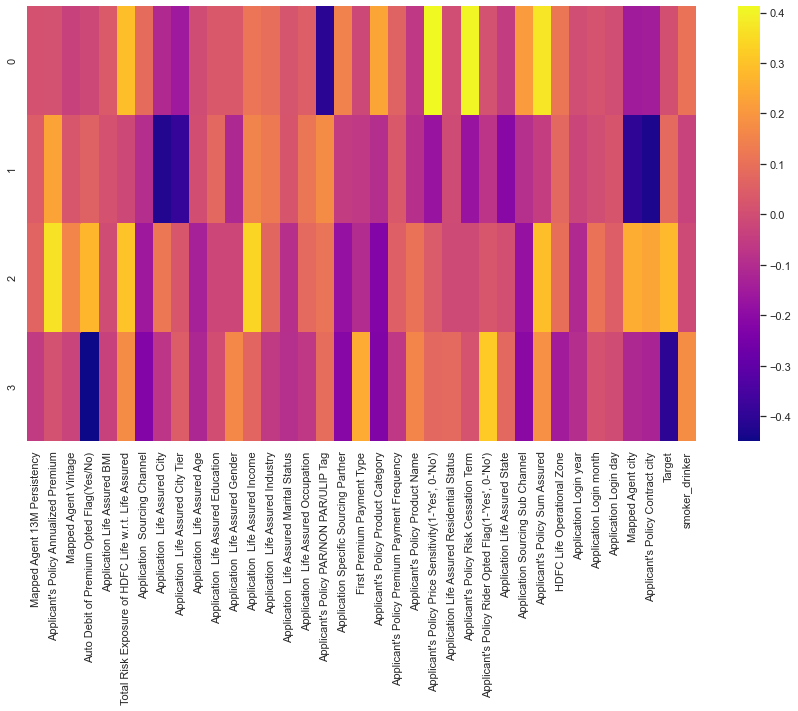

In [47]:
plt.figure(figsize=(15,8))
sns.heatmap(df_train_comp, cmap='plasma',)

In [48]:
df_train_2 = df_train_comp.T

In [49]:
df_train_2.columns = ['PC1', 'PC2', 'PC3', 'PC4']
df_train_2

,PC1,PC2,PC3,PC4
Mapped Agent 13M Persistency,0.012756,0.047400,0.066413,-0.052496
Applicant's Policy Annualized Premium,0.008479,0.231326,0.365273,0.009720
Mapped Agent Vintage,-0.034121,0.025403,0.158753,-0.025747
Auto Debit of Premium Opted Flag(Yes/No),-0.012765,0.055738,0.277102,-0.449762
Application Life Assured BMI,0.036669,0.013409,-0.003667,-0.032329
Total Risk Exposure of HDFC Life w.r.t. Life Assured,0.294260,-0.013707,0.301968,0.175979
Application Sourcing Channel,0.086860,-0.093385,-0.158205,-0.222266
Application Life Assured City,-0.108345,-0.421509,0.119447,-0.069654
Application Life Assured City Tier,-0.155918,-0.388756,0.026226,0.048397
Application Life Assured Age,-0.004817,0.002046,-0.135836,-0.115995


We are observing four PCA components

In [50]:
pca.explained_variance_

array([4.07789693, 2.87142284, 2.00277173, 1.57275925])

In [51]:
pca.explained_variance_ratio_*100

array([11.02090777,  7.76029576,  5.41268278,  4.25053278])

In [52]:
df_train_2.head()

,PC1,PC2,PC3,PC4
Mapped Agent 13M Persistency,0.012756,0.047400,0.066413,-0.052496
Applicant's Policy Annualized Premium,0.008479,0.231326,0.365273,0.009720
Mapped Agent Vintage,-0.034121,0.025403,0.158753,-0.025747
Auto Debit of Premium Opted Flag(Yes/No),-0.012765,0.055738,0.277102,-0.449762
Application Life Assured BMI,0.036669,0.013409,-0.003667,-0.032329


In [53]:
df_train_3 = df_train_2.T
df_train_3

,Mapped Agent 13M Persistency,Applicant's Policy Annualized Premium,Mapped Agent Vintage,Auto Debit of Premium Opted Flag(Yes/No),Application Life Assured BMI,Total Risk Exposure of HDFC Life w.r.t. Life Assured,Application Sourcing Channel,Application Life Assured City,Application Life Assured City Tier,Application Life Assured Age,...,Application Sourcing Sub Channel,Applicant's Policy Sum Assured,HDFC Life Operational Zone,Application Login year,Application Login month,Application Login day,Mapped Agent city,Applicant's Policy Contract city,Target,smoker_drinker
PC1,0.012756,0.008479,-0.034121,-0.012765,0.036669,0.294260,0.086860,-0.108345,-0.155918,-0.004817,...,0.210186,0.373010,0.116988,-0.001788,0.017133,0.000918,-0.150347,-0.143759,0.005982,0.107931
PC2,0.047400,0.231326,0.025403,0.055738,0.013409,-0.013707,-0.093385,-0.421509,-0.388756,0.002046,...,-0.091899,-0.047407,0.076210,-0.024298,0.000666,0.024158,-0.402037,-0.427330,0.079575,-0.029214
PC3,0.066413,0.365273,0.158753,0.277102,-0.003667,0.301968,-0.158205,0.119447,0.026226,-0.135836,...,-0.179962,0.292914,0.096077,-0.106597,0.106410,0.048819,0.254785,0.233764,0.283843,-0.009411
PC4,-0.052496,0.009720,-0.025747,-0.449762,-0.032329,0.175979,-0.222266,-0.069654,0.048397,-0.115995,...,-0.205666,0.184110,-0.148061,-0.094024,0.014042,-0.004592,-0.111672,-0.124458,-0.404897,0.177303


In [56]:
print('Index which gives maximum value from a target function:', df_train_3['Mapped Agent 13M Persistency'].argmax())

Index which gives maximum value from a target function: 2


In index 2 we can see that PC3 gives maximum value from a target function

([<matplotlib.axis.XTick at 0x189136fa0d0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

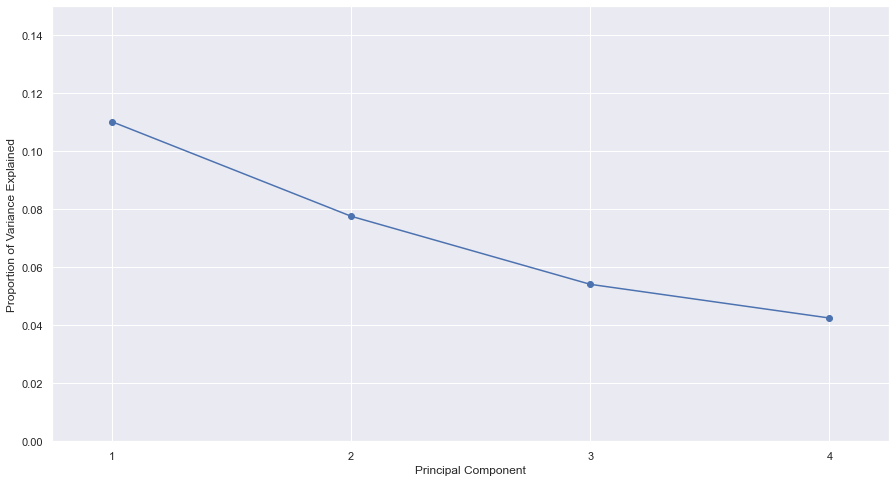

In [62]:
plt.figure(figsize=(15,8))
plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,0.15)
plt.xticks([1,2,3,4])

### 4.1 KMeans

The K-means clustering technique is used to detect groupings in data that have not been explicitly categorised. This may be used to validate business assumptions about the sorts of groups that exist or to find unknown groups in large data sets.

In [63]:
from sklearn.cluster import KMeans

In [64]:
k = 3
clusters = KMeans(k, random_state = 42 )
clusters.fit(df_train_2)

KMeans(n_clusters=3, random_state=42)

In [65]:
df_train_2['Cluster'] = clusters.labels_
df_train_2

,PC1,PC2,PC3,PC4,Cluster
Mapped Agent 13M Persistency,0.012756,0.047400,0.066413,-0.052496,1
Applicant's Policy Annualized Premium,0.008479,0.231326,0.365273,0.009720,1
Mapped Agent Vintage,-0.034121,0.025403,0.158753,-0.025747,1
Auto Debit of Premium Opted Flag(Yes/No),-0.012765,0.055738,0.277102,-0.449762,1
Application Life Assured BMI,0.036669,0.013409,-0.003667,-0.032329,1
Total Risk Exposure of HDFC Life w.r.t. Life Assured,0.294260,-0.013707,0.301968,0.175979,0
Application Sourcing Channel,0.086860,-0.093385,-0.158205,-0.222266,1
Application Life Assured City,-0.108345,-0.421509,0.119447,-0.069654,2
Application Life Assured City Tier,-0.155918,-0.388756,0.026226,0.048397,2
Application Life Assured Age,-0.004817,0.002046,-0.135836,-0.115995,1


In [66]:
df_train_2[df_train_2.Cluster == 0]

,PC1,PC2,PC3,PC4,Cluster
Total Risk Exposure of HDFC Life w.r.t. Life Assured,0.294260,-0.013707,0.301968,0.175979,0
Application Life Assured Gender,0.032414,-0.112513,-0.016807,0.163821,0
First Premium Payment Type,-0.013769,-0.060008,-0.101562,0.247782,0
Applicant's Policy Product Name,-0.064558,-0.089297,0.108216,0.158689,0
"Applicant's Policy Price Sensitivity(1-'Yes', 0-'No')",0.412117,-0.171767,0.040152,0.077240,0
Applicant's Policy Risk Cessation Term,0.403518,-0.170406,-0.010301,0.017579,0
"Applicant's Policy Rider Opted Flag(1-'Yes', 0-'No')",0.010907,-0.074059,0.025953,0.316710,0
Applicant's Policy Sum Assured,0.373010,-0.047407,0.292914,0.184110,0
smoker_drinker,0.107931,-0.029214,-0.009411,0.177303,0


In [67]:
df_train_2[df_train_2.Cluster == 1]

,PC1,PC2,PC3,PC4,Cluster
Mapped Agent 13M Persistency,0.012756,0.047400,0.066413,-0.052496,1
Applicant's Policy Annualized Premium,0.008479,0.231326,0.365273,0.009720,1
Mapped Agent Vintage,-0.034121,0.025403,0.158753,-0.025747,1
Auto Debit of Premium Opted Flag(Yes/No),-0.012765,0.055738,0.277102,-0.449762,1
Application Life Assured BMI,0.036669,0.013409,-0.003667,-0.032329,1
Application Sourcing Channel,0.086860,-0.093385,-0.158205,-0.222266,1
Application Life Assured Age,-0.004817,0.002046,-0.135836,-0.115995,1
Application Life Assured Education,0.034240,0.075951,-0.018518,0.003350,1
Application Life Assured Income,0.114612,0.151261,0.340856,0.072035,1
Application Life Assured Industry,0.094432,0.125303,0.072893,-0.059192,1


In [68]:
df_train_2[df_train_2.Cluster == 2]

,PC1,PC2,PC3,PC4,Cluster
Application Life Assured City,-0.108345,-0.421509,0.119447,-0.069654,2
Application Life Assured City Tier,-0.155918,-0.388756,0.026226,0.048397,2
Application Life Assured State,-0.052228,-0.209446,0.004866,0.076736,2
Mapped Agent city,-0.150347,-0.402037,0.254785,-0.111672,2
Applicant's Policy Contract city,-0.143759,-0.427330,0.233764,-0.124458,2


In [70]:
k = 5
clusters = KMeans( k, random_state = 42 )
clusters.fit(df_train_1)

KMeans(n_clusters=5, random_state=42)

In [71]:
y = pd.DataFrame(clusters.labels_)

In [72]:
y.column = 'Cluster'

In [73]:
df_2 = df_train.copy()

In [74]:
df_2['Cluster'] = y

In [76]:
Cluster_1 = df_2[df_2.Cluster == 0]

In [77]:
Cluster_2 = df_2[df_2.Cluster == 1]

In [78]:
Cluster_3 = df_2[df_2.Cluster == 2]

In [79]:
Cluster_4 = df_2[df_2.Cluster == 3]

In [80]:
Cluster_5 = df_2[df_2.Cluster == 4]

In [81]:
Cluster_1['Target'].value_counts()

1    6396
0    2160
Name: Target, dtype: int64

In [82]:
Cluster_2['Target'].value_counts()

1    3823
0     735
Name: Target, dtype: int64

In [83]:
Cluster_3['Target'].value_counts()

1    2081
0     513
Name: Target, dtype: int64

In [84]:
Cluster_4['Target'].value_counts()

1    4768
0     956
Name: Target, dtype: int64

In [85]:
Cluster_5['Target'].value_counts()

1    2645
0    1243
Name: Target, dtype: int64

### 4.2 KModes

KModes clustering is an unsupervised Machine Learning technique for grouping categorical data. KMeans clusters continuous data using mathematical metrics (distance). The closer our data points are together, the shorter the distance. Means is responsible for keeping centroids up to date.

In [87]:
from kmodes.kmodes import KModes

In [88]:
km_cao = KModes(n_clusters=5, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df_train)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7093, cost: 391723.0
Run 1, iteration: 2/100, moves: 1075, cost: 391344.0
Run 1, iteration: 3/100, moves: 237, cost: 391344.0


In [89]:
fitClusters_cao

array([3, 4, 2, ..., 0, 2, 4], dtype=uint16)

In [90]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df_train.columns

The centre of the clusters may be calculated by dividing the total by the number of cluster members. In the above example, 283 divided by four equals 70.75, and 213 divided by four equals 53.25, indicating that the cluster's centroid is (70.75, 53.25)

In [91]:
clusterCentroidsDf

,Mapped Agent 13M Persistency,Applicant's Policy Annualized Premium,Mapped Agent Vintage,Auto Debit of Premium Opted Flag(Yes/No),Application Life Assured BMI,Total Risk Exposure of HDFC Life w.r.t. Life Assured,Application Sourcing Channel,Application Life Assured City,Application Life Assured City Tier,Application Life Assured Age,...,Application Sourcing Sub Channel,Applicant's Policy Sum Assured,HDFC Life Operational Zone,Application Login year,Application Login month,Application Login day,Mapped Agent city,Applicant's Policy Contract city,Target,smoker_drinker
0,80.18,50000.0,12.0,1.0,2.0,500000.0,2.0,10.0,2.0,1.0,...,1.0,1000000.0,1.0,2018.0,3.0,1.0,10.0,13.0,1.0,0.0
1,80.18,100000.0,84.0,1.0,3.0,5000000.0,0.0,8.0,0.0,0.0,...,0.0,5000000.0,5.0,2018.0,3.0,1.0,8.0,10.0,1.0,0.0
2,80.18,30000.0,9.0,0.0,2.0,5000000.0,1.0,10.0,2.0,3.0,...,3.0,5000000.0,5.0,2018.0,1.0,29.0,10.0,13.0,1.0,0.0
3,80.18,398120.0,11.0,1.0,2.0,5000000.0,2.0,10.0,0.0,3.0,...,1.0,5000000.0,5.0,2018.0,12.0,31.0,10.0,13.0,1.0,0.0
4,80.18,25000.0,13.0,0.0,3.0,250000.0,2.0,10.0,2.0,3.0,...,1.0,500000.0,5.0,2018.0,3.0,1.0,10.0,13.0,1.0,0.0


In [92]:
km_huang = KModes(n_clusters=5, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(df_train)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 10002, cost: 398549.0
Run 1, iteration: 2/100, moves: 295, cost: 398549.0


In [93]:
fitClusters_huang

array([0, 1, 3, ..., 4, 2, 2], dtype=uint16)

In [94]:
clusterCentroidsDf = pd.DataFrame(km_huang.cluster_centroids_)
clusterCentroidsDf.columns = df_train.columns

In [95]:
clusterCentroidsDf

,Mapped Agent 13M Persistency,Applicant's Policy Annualized Premium,Mapped Agent Vintage,Auto Debit of Premium Opted Flag(Yes/No),Application Life Assured BMI,Total Risk Exposure of HDFC Life w.r.t. Life Assured,Application Sourcing Channel,Application Life Assured City,Application Life Assured City Tier,Application Life Assured Age,...,Application Sourcing Sub Channel,Applicant's Policy Sum Assured,HDFC Life Operational Zone,Application Login year,Application Login month,Application Login day,Mapped Agent city,Applicant's Policy Contract city,Target,smoker_drinker
0,80.18,50000.0,20.0,1.0,3.0,500000.0,2.0,10.0,2.0,0.0,...,1.0,1000000.0,0.0,2018.0,1.0,29.0,10.0,13.0,1.0,0.0
1,80.18,100000.0,12.0,0.0,2.0,1000000.0,2.0,10.0,2.0,2.0,...,1.0,1000000.0,5.0,2018.0,7.0,20.0,10.0,13.0,1.0,0.0
2,80.18,30000.0,8.0,0.0,2.0,300000.0,2.0,10.0,2.0,3.0,...,1.0,600000.0,1.0,2018.0,3.0,27.0,10.0,13.0,1.0,0.0
3,80.18,25000.0,8.0,1.0,2.0,250000.0,2.0,10.0,1.0,0.0,...,1.0,500000.0,5.0,2018.0,12.0,1.0,10.0,13.0,1.0,0.0
4,80.18,50000.0,15.0,1.0,2.0,500000.0,2.0,10.0,1.0,2.0,...,1.0,500000.0,1.0,2018.0,1.0,1.0,10.0,13.0,1.0,0.0


Seperating out the columns on the basis of paid and not paid. Which column is more convinient on paid or not paid

In [96]:
NP = df_train[df_train['Target'] == 0]

In [97]:
P = df_train[df_train['Target'] == 1]

In [98]:
NP = NP.drop('Target',axis = 1)

In [99]:
P = P.drop('Target',axis = 1)

In [100]:
df_train.columns

Index(['Mapped Agent 13M Persistency', 'Applicant's Policy Annualized Premium',
       'Mapped Agent Vintage', 'Auto Debit of Premium Opted Flag(Yes/No)',
       'Application Life Assured BMI',
       'Total Risk Exposure of HDFC Life w.r.t. Life Assured',
       'Application  Sourcing Channel', 'Application  Life Assured City',
       'Application  Life Assured City Tier', 'Application  Life Assured Age',
       'Application  Life Assured Education',
       'Application  Life Assured Gender', 'Application  Life Assured Income',
       'Application  Life Assured Industry',
       'Application  Life Assured Marital Status',
       'Application  Life Assured Occupation',
       'Applicant's Policy PAR/NON PAR/ULIP Tag',
       'Application Specific Sourcing Partner', 'First Premium Payment Type',
       'Applicant's Policy Product Category',
       'Applicant's Policy Premium Payment Frequency',
       'Applicant's Policy Product Name',
       'Applicant's Policy Price Sensitivity(1-'Yes

In [101]:
a = []
b = []

In [102]:
for i in range(len(P.columns)):
        a.append(NP.iloc[:,i].mean())

In [103]:
for j in range(len(P.columns)):
        b.append(P.iloc[:,j].mean())

In [104]:
dx = pd.DataFrame()

In [105]:
len(a)

36

In [106]:
dx['NP'] = a

In [107]:
dx['P'] = b

In [108]:
dx.index = P.columns

In [109]:
dx

,NP,P
Mapped Agent 13M Persistency,7.634366e+01,7.822451e+01
Applicant's Policy Annualized Premium,5.613681e+04,6.617417e+04
Mapped Agent Vintage,2.279722e+01,2.484416e+01
Auto Debit of Premium Opted Flag(Yes/No),9.809167e-02,7.420991e-01
Application Life Assured BMI,2.399857e+00,2.411911e+00
Total Risk Exposure of HDFC Life w.r.t. Life Assured,1.571289e+06,1.974444e+06
Application Sourcing Channel,1.932049e+00,1.891949e+00
Application Life Assured City,9.114678e+00,8.857049e+00
Application Life Assured City Tier,1.337792e+00,1.199564e+00
Application Life Assured Age,1.611557e+00,1.541572e+00


In [110]:
dx['diff'] = dx['P'] - dx['NP']

In [111]:
dx['diff'] = (dx['diff'] - dx['diff'].min())/(dx['diff'].max() - dx['diff'].min())

In [112]:
dx['diff']

Mapped Agent 13M Persistency                             0.000009
Applicant's Policy Annualized Premium                    0.024901
Mapped Agent Vintage                                     0.000010
Auto Debit of Premium Opted Flag(Yes/No)                 0.000006
Application Life Assured BMI                             0.000004
Total Risk Exposure of HDFC Life w.r.t. Life Assured     1.000000
Application  Sourcing Channel                            0.000004
Application  Life Assured City                           0.000004
Application  Life Assured City Tier                      0.000004
Application  Life Assured Age                            0.000004
Application  Life Assured Education                      0.000005
Application  Life Assured Gender                         0.000004
Application  Life Assured Income                         0.493681
Application  Life Assured Industry                       0.000005
Application  Life Assured Marital Status                 0.000004
Applicatio

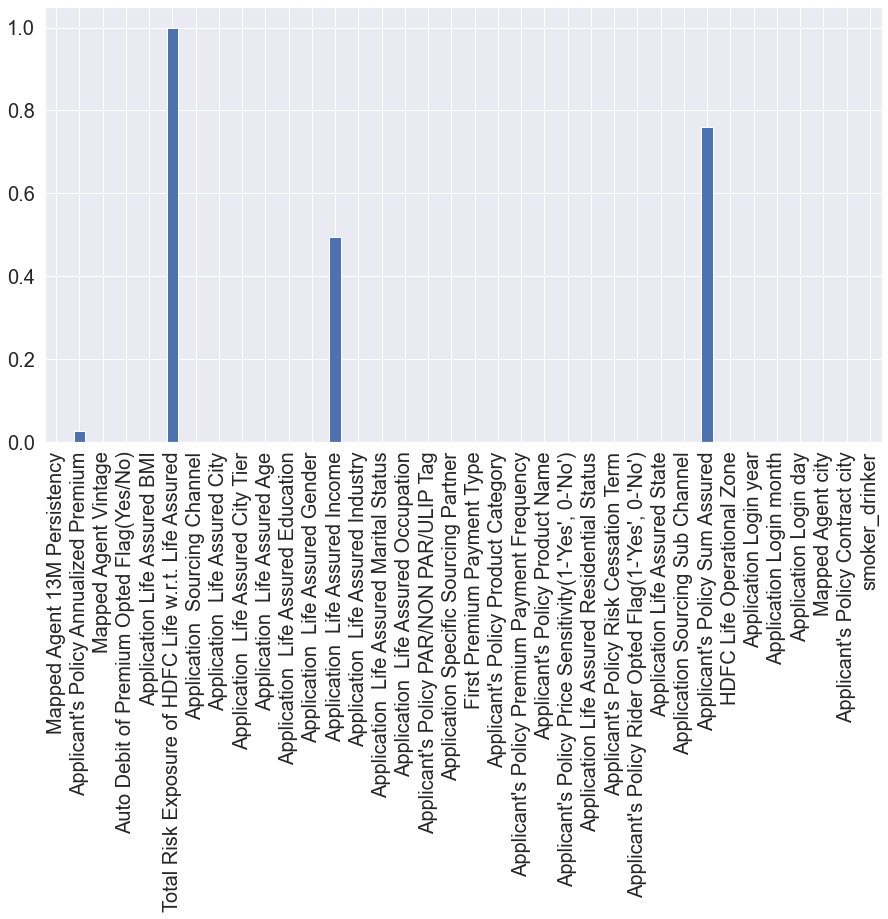

In [113]:
dx['diff'].plot(kind = 'bar', figsize = (15,8) )
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()